## Исследование данных о российском кинопрокате



Описание проекта:

Для выявления текущих трендов в Российской киноиндустрии необходимо провести исследовательский анализ двух датасетов, опубликованных на сайте Минкульта РФ

План работы:

 1. Объединить данные двух датасетов
 2. Провести предобработку данных: заполнить пропуски и удалить дубликаты
 3. Провести исследовательский анализ данных
 4. Выявить закономерности в данных о фильмах, которым предоставлялись субсидии от Правительства РФ
 
Цель проекта: 

Выявить основные тренды развития киноиндустрии в России, а также найти особенности фильмов с гос поддержкой, на основе данных о кинопрокате

### Шаг 1. Откроем файлы с данными и объединим датасеты

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [ ]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
print(mkrf_movies.info(),'\n'*3)
print(mkrf_shows.info())

In [ ]:
mkrf_movies.head()

In [ ]:
# Исправим названия столбцов
mkrf_movies = mkrf_movies.rename(columns={'puNumber':'pu_number'})
mkrf_shows = mkrf_shows.rename(columns={'puNumber':'pu_number'})

In [3]:
# Изменим формат отображение вещественных чисел в пандас
pd.set_option('display.float_format', '{:,.2f}'.format)

In [6]:
mkrf_shows.head()

,pu_number,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


В каждой строке в столбце pu_number в конце есть пробел, который мешает объединить данные

In [7]:
# удалим пробелы
mkrf_shows['pu_number'] = mkrf_shows['pu_number'].replace(' ', '')
mkrf_movies['pu_number'] = mkrf_movies['pu_number'].replace(' ', '')

In [8]:
# При простой попытке смены типа данных появляется ошибка, связанная с наличием нечисловых данных в одной строке (значение "нет")
mkrf_movies.loc[mkrf_movies['pu_number'] == 'нет', 'pu_number'] = '0'

In [9]:
# Поменяем тип данных столбца puNumber на float
mkrf_movies['pu_number'] = mkrf_movies['pu_number'].astype(float)

Наконец можем объединять данные без проблем

In [10]:
# объединяем две таблицы
df = mkrf_movies.merge(mkrf_shows, how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Урааааа, наконец-то получилось!!

Вывод: датафреймы объединены. Итогом стал датафрейм 16х7485. Сразу можно заметить, что в датафрейме есть множество пропусков, требующих анализа

Ошибки в названиях столбцов были устранены

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Поменяем тип данных в столбце show_start_date на datetime

In [12]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

При попытке просто сменить тип данных в столбце ratings возникает ошибка

In [13]:
# Выведем на экран все уникальные значения столбца ratings
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

В столбце содержатся два типа рейтинга: в процентах и рейтинг по 10ти балльной шкале

In [14]:
# уберём из значений знак %, переведём в числовые значения, разделим значения больше 10ти на 10
df['ratings'] = df['ratings'].replace('%', '', regex=True)
df['ratings'] = df['ratings'].astype(float)
df.loc[df['ratings']>10, 'ratings'] /= 10
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   float64       
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   float64       
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
df.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00",332.00,332.00,332.00,"6,519.00","3,158.00"
mean,"135,178,527.64","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
std,"38,382,177.41","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"
min,0.00,0.00,0.00,0.00,1.00,0.00
25%,"112,025,043.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"121,015,464.50",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"124,003,313.75","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


In [18]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Количество данных итак небольшое, поэтому с пропусками надо быть поаккуратнее

Пропуски в столбцах refundable_support, nonrefundable_support, budget, financing_source связаны с тем, что правительство не выделяло на них средства

In [19]:
# выведем на экран строки с пропусками в столюце production_country
df[df['production_country'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...","111,001,216.00",2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,"214,000,410.00",2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


очевидно, что Ералаш - "фильм" российского производства
Мульт личности - это мультфильм российского производства, который показывали по первому каналу (судя по информации из Кинопоиска)

In [20]:
# заполним пропуски в столбце 
df['production_country'] = df['production_country'].fillna('Россия')

Посмотрим на особенности других пропусков

In [21]:
df[df['film_studio'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,"121,011,114.00",2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,"214,000,410.00",2010-01-25 12:00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,"111,013,818.00",2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,"112,007,018.00",2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,"112,011,818.00",2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,"112,011,918.00",2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,"111,021,918.00",2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"41,225.00"
6485,До и После,"112,014,418.00",2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,"113,002,018.00",2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,"112,014,918.00",2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски в столбце с информацией о студии возникли, вероятно, потому, что студии нет или она не включена в БД минкульта

In [22]:
# Заполним пропуски в данном столбце значениями unknown
df['film_studio'] = df['film_studio'].fillna('unknown')

In [23]:
# Выведем на экран строки с пропусками в director
df[df['director'].isna() == True]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...","126,003,512.00",2012-12-04 12:00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,"126,003,413.00",2013-09-11 12:00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,"217,027,010.00",2010-06-24 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...","217,017,310.00",2010-04-22 12:00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),"217,020,610.00",2010-05-20 12:00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,"126,001,710.00",2010-11-11 12:00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,"214,000,410.00",2010-01-25 12:00:00,Художественный,unknown,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,"126,001,111.00",2011-04-25 12:00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,"126,002,711.00",2011-11-11 12:00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Все фильмы, у которых нет режиссёра являются записями концертов. Следовательно, можно либо заполнить пропуски значениями '-'

In [24]:
# заполним пропуски прочерками
df.loc[df['director'].isna() == True, 'director'] = '-'

Пропуски также есть в столбце с данными о продюссерах, однако их количество уже превышает 500 единиц, что является большим значением, поэтому оставляем как есть 

Пропуски в рейтинге фильма также не будем заполнять, так как, вероятно, фильмы просто не получили ни одной оценки (для нулевой оценки есть отдельное значение, а заполнение медианой нескольких сотен пропусков приведёт к искажению в данных)

Пропуски в жанре можно заполнить значением unclassified

In [25]:
# Заполним пропуски в столбце с информацией о жанре
df['genres'] = df['genres'].fillna('unclassified')

Пропуски в сборах нельзя объяснить просто тем, что фильм ничего не собрал в прокате, так как в датафрейме есть строки с нулевым значением в столбце box_office. Скорее всего, в БД минкульта просто отсутствуют записи о сборах этих фильмов, или же они вышли в прокат, но не показывались в кинотеатре (а показывались только по ТВ), или же они вышли в прокат, но показывались в кино бесплатно. Заполнить медианой тоже не можем, так как приведёт к сильному выбросу

In [26]:
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                      0
box_office               4328
dtype: int64

Вывод: после заполнения пропусков пропуски было решено оставить в столбцах producer, refundable_support, nonrefundable_support, budget, financing_source, ratings, box_office

Там, где это было рационально сделать, пропуски были заполнены

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [27]:
# выведем на экран количество дубликатов по всем столбцам
df.duplicated().sum()

0

Полных дубликатов в датафрейме нет

In [28]:
df['pu_number'].duplicated().sum()

2

Номера прокатных удостоверений являются уникальными значениями, что позволяет нам без потери в качестве данных удалить дубликаты

In [29]:
# Удалим дубликаты
df = df.drop_duplicates(subset='pu_number').reset_index()

Теперь проверим количество строк полных дубликатов

In [30]:
df.duplicated().sum()

0

Полные дубликаты отсутствуют

Проверим датафрейм на наличие неявных дубликатов

In [31]:
# Проверим названия фильмов на наличие явных дубликатов
df['title'].duplicated().sum()

713

Дубликаты в столбце есть, однако одинаковые фильмы могут иметь разные прокатные удостоверения, так как удостоверения выдаются отдельно на показ в кинотеатрах, на продажу фильма на носителях, на трансляцию по кабельным сетям и т.д. Поэтому одинаковые фильмы с разными удостоверениями не являются дубликатами.

Проверим наличие в столбцах категориальных значений неявных дубликатов

Для этого начнём поочерёдно выводить на экран уникальные значения столбцов (переходим к шагу 2.4)

#### Шаг 2.4. Изучим категориальные значения

In [32]:
# Выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7484 entries, 0 to 7483
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  7484 non-null   int64         
 1   title                  7484 non-null   object        
 2   pu_number              7484 non-null   float64       
 3   show_start_date        7484 non-null   datetime64[ns]
 4   type                   7484 non-null   object        
 5   film_studio            7484 non-null   object        
 6   production_country     7484 non-null   object        
 7   director               7484 non-null   object        
 8   producer               6916 non-null   object        
 9   age_restriction        7484 non-null   object        
 10  refundable_support     332 non-null    float64       
 11  nonrefundable_support  332 non-null    float64       
 12  budget                 332 non-null    float64       
 13  fin

In [33]:
# Выведем на экран все уникальные значения "типа" фильма
set(df['type'].unique())

{' Анимационный',
 ' Художественный',
 'Анимационный',
 'Документальный',
 'Музыкально-развлекательный',
 'Научно-популярный',
 'Прочие',
 'Художественный'}

In [34]:
# Выведем на экран все уникальные значения страны производства фильма
set(df['production_country'].unique())

{' СССР',
 ' СССР ',
 ' СССР   ',
 '2019',
 'CША',
 'Австралия',
 'Австралия - Великобритания - Бельгия - Индия',
 'Австралия - Германия',
 'Австралия - Ирландия',
 'Австралия - Колумбия',
 'Австралия - США',
 'Австралия, Канада',
 'Австралия, США',
 'Австралия-Великобритания',
 'Австралия-Ирландия',
 'Австралия-США',
 'Австралия-Турция-США',
 'Австрия',
 'Австрия - Германия',
 'Австрия - Германия - Франция',
 'Австрия - Люксембург',
 'Австрия, Великобритания, Германия',
 'Австрия-Германия-Франция',
 'Австрия-Франция-Германия',
 'Азербайджан-Россия',
 'Аргентина',
 'Аргентина - Бразилия',
 'Аргентина - Испания',
 'Аргентина - Испания - Уругвай',
 'Аргентина - Мексика - Бразилия - Франция - США',
 'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
 'Аргентина - Франция - Испания',
 'Аргентина, Испания',
 'Аргентина-Испания',
 'Армения',
 'Армения - Германия',
 'Армения - Казахстан',
 'Армения-Россия',
 'Бельгия',
 'Бельгия - Германия - Люксембург',
 'Бельгия - Германия - 

In [35]:
# Выведем на экран все уникальные значения возрастного ограничения фильма
set(df['age_restriction'].unique())

{'«0+» - для любой зрительской аудитории',
 '«12+» - для детей старше 12 лет',
 '«16+» - для детей старше 16 лет',
 '«18+» - запрещено для детей',
 '«6+» - для детей старше 6 лет'}

Для удобства построения диаграмм в дальнейшем (из-за длины подписи к осям будут "слипаться") сократим строки до указания возраста, а пояснения к возрастным ограничениям уберём

In [37]:
# заменим значения 
display(temp.age_restriction.unique())
temp['age_restriction'] = temp['age_restriction'].apply(lambda x: x.split('-')[0].replace('«','').replace('»','').strip())
temp.age_restriction.unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

array(['18+', '6+', '12+', '16+', '0+'], dtype=object)

In [38]:
set(df['financing_source'].unique())

{nan, 'Министерство культуры', 'Министерство культуры, Фонд кино', 'Фонд кино'}

In [39]:
set(df['genres'].unique())

{'unclassified',
 'аниме,мультфильм',
 'аниме,мультфильм,боевик',
 'аниме,мультфильм,детектив',
 'аниме,мультфильм,драма',
 'аниме,мультфильм,комедия',
 'аниме,мультфильм,короткометражка',
 'аниме,мультфильм,мелодрама',
 'аниме,мультфильм,приключения',
 'аниме,мультфильм,ужасы',
 'аниме,мультфильм,фантастика',
 'аниме,мультфильм,фэнтези',
 'биография',
 'биография,военный,драма',
 'биография,документальный',
 'биография,драма',
 'биография,драма,военный',
 'биография,драма,история',
 'биография,драма,криминал',
 'биография,история',
 'биография,история,драма',
 'биография,криминал,драма',
 'биография,криминал,триллер',
 'биография,мелодрама,драма',
 'биография,музыка,драма',
 'биография,музыка,мюзикл',
 'биография,спорт,драма',
 'биография,спорт,история',
 'биография,спорт,комедия',
 'боевик',
 'боевик,вестерн,приключения',
 'боевик,военный',
 'боевик,военный,драма',
 'боевик,военный,история',
 'боевик,детектив',
 'боевик,драма',
 'боевик,драма,биография',
 'боевик,драма,вестерн',
 'бо

Обнаружены неявные дубликаты, возникающие из-за пробела в начале в столбцах с данными о стране производства и о типе картины

Также обнаружена ошибка, связанная с появлением значения, которое не может обозначать страну (речь об уникальном значении '2019' в столбце 'production_country')

In [40]:
# Посчитаем количество строк со значением '2019' в столбце production_country
df[df['production_country'] == '2019']['production_country'].count()

1

удалим эту строку

In [41]:
df = df.query('production_country != "2019"')

In [42]:
# Удалим пробелы, вызывающие проблему неявных дубликатов
df['production_country'] = df['production_country'].str.strip()
df['type'] = df['type'].str.strip()

Вывод: ошибки в категориальных значениях устранены там, где это было возможно сделать

Возможно, неявные дубликаты остаются в столбцах с данными о продюссерах, режиссёрах и названиях студий, но там очень много уникальных значений. А с учётом, что эти данные не понадобятся в дальнейшем анализе, было бы нецелесообразно тратить время на поиск неявных дубликатов в этих столбцах (тем более, что записи не должны быть уникальными)

#### Шаг 2.5. Проверим количественные значения

In [43]:
# выведем на экран общее описание данных
df.describe()

,index,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,483.00","7,483.00",332.00,332.00,332.00,"6,516.00","3,158.00"
mean,"3,741.73","135,157,453.15","11,864,457.83","48,980,988.89","127,229,716.68",6.49,"76,478,696.16"
std,"2,161.14","38,363,803.56","24,916,555.26","59,980,117.92","188,588,333.12",1.11,"240,353,122.82"
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,"1,870.50","112,024,968.00",0.00,"25,000,000.00","42,000,000.00",5.90,"86,239.00"
50%,"3,741.00","121,015,418.00",0.00,"30,000,000.00","68,649,916.00",6.60,"2,327,987.55"
75%,"5,613.50","124,003,312.50","15,000,000.00","40,375,000.00","141,985,319.50",7.20,"23,979,671.02"
max,"7,485.00","231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79"


На первый взгляд ошибок нет

Проверим столбец budget. Если сумма всех видов гос поддержки будет больше, чем бюджет фильма, то это ставит под сомнение достоверность такой записи

In [44]:
# посчитаем количество записей, в которых сумма значений в refundable_support...
# ... и nonrefundable_support больше, чем значение в столбце budget

(
    df[(df['refundable_support']+df['nonrefundable_support']) > df['budget']]
        ['nonrefundable_support'].count()
)

17

Количество таких фильмов 17. Проверим, не является ли это ошибкой. Выведем такие строки на экран

In [45]:
df[(df['refundable_support']+df['nonrefundable_support']) > df['budget']]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,2053,14+,"111,023,614.00",2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",16+,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,2058,Дуxless 2,"111,000,415.00",2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",16+,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,2472,Воин (2015),"111,017,315.00",2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",12+,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,2532,Бармен.,"111,009,615.00",2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,16+,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,2615,Савва. Сердце воина,"114,001,715.00",2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,6+,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,2684,Тряпичный союз,"111,010,215.00",2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",18+,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,2788,Срочно выйду замуж,"111,017,115.00",2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,2874,Помню - не помню!,"111,004,916.00",2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",12+,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,3047,Любовь с ограничениями,"111,008,216.00",2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",16+,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,3565,Притяжение (2016),"111,018,116.00",2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",12+,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Деньги были выделены, а в бюджете всё равно указано 0

Вероятно, тут имела место деятельность коррупционных банд!!

In [46]:
# возвращаем народные деньги в бюджет 🧙‍♂️🧙‍♂️🧙‍♂️🧙‍♂️
df.loc[df['budget'] == 0, 'budget'] = (
    df.loc[df['budget']==0, 'nonrefundable_support']
         + df.loc[df['budget'] == 0, 'refundable_support']
)

In [47]:
(
    df[(df['refundable_support']+df['nonrefundable_support']) > df['budget']]
        ['nonrefundable_support'].count()
)

0

Коррупция побеждена, можно спать спокойно!!

На всякий случай проверим также строки, где в столбце со сборами установлено значение 0

In [48]:
df[df['box_office'] == 0]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
66,66,Анна Павлова,"111,011,013.00",2013-12-19 12:00:00,Художественный,"совместное производство Киностудия ""Мосфильм"",...","СССР, Франция, Англия, Куба, ГДР",Эмиль Лотяну,NaN,6+,NaN,NaN,NaN,NaN,7.70,"драма,биография,музыка",0.00
237,237,Подранки,"111,007,613.00",2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Н.Губенко,NaN,12+,NaN,NaN,NaN,NaN,8.20,драма,0.00
596,596,Запах вереска,"111,003,012.00",2012-05-23 12:00:00,Художественный,"ООО ""Студия РИМ""",Россия,А.Магомедов,"М.Балашова, Е.Миронов",16+,NaN,NaN,NaN,NaN,6.30,комедия,0.00
914,914,В тумане /По одноименной повести Василя Быкова/,"121,027,712.00",2012-11-07 12:00:00,Художественный,"Ма Йа Де Фикшн, Лемминг Филм, Беларусьфильм, Д...",Германия - Нидерланды - Беларусь - Россия - Ла...,Сергей Лозница,Хайно Декерт,12+,NaN,NaN,NaN,NaN,6.50,"драма,военный,история",0.00
932,932,Письмо для Момо,"124,002,912.00",2012-10-25 12:00:00,Анимационный,"Кадокава Пикчерз, Продакшнз И Джи, Токио Броад...",Япония,Окиура Хироюки,"Хироюки Икеда, Митсухиса Ишикава, Кацзуя Хамана",12+,NaN,NaN,NaN,NaN,7.40,"аниме,мультфильм,драма",0.00
933,933,Летние войны,"124,002,812.00",2012-10-25 12:00:00,Анимационный,"Медхауз, Ниппон Телевижн Нетуорк Корпорейшн, К...",Япония,Мамору Хосода,"Такафуми Ватанабэ, Такуя Ито, Сэйдзи Окуда, Юи...",12+,NaN,NaN,NaN,NaN,7.70,"аниме,мультфильм,фантастика",0.00
976,976,Гарегин Нжде,"131,000,213.00",2013-04-23 12:00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,12+,NaN,NaN,NaN,NaN,7.90,биография,0.00
1126,1126,Марафон,"111,006,712.00",2012-12-18 12:00:00,Художественный,"ООО ""Синема Арт Студио""",Россия,К.Оганесян,К.Оганесян,16+,NaN,NaN,NaN,NaN,5.50,"комедия,мелодрама",0.00
1387,1387,Экзамен для двоих /По роману Джин Ханфф Корелитц/,"121,014,613.00",2013-06-11 12:00:00,Художественный,Депф оф Филд,США,Пол Вайц,"Пол Вайц, Керри Кохански, Эндрю Миано",12+,NaN,NaN,NaN,NaN,5.80,"мелодрама,комедия,драма",0.00
1559,1559,Последняя любовь мистера Моргана /По роману Фр...,"121,002,614.00",2014-02-11 12:00:00,Художественный,"Камински Штим Фильм, Бавариа Пикчерз, Сенатор ...",Германия - Бельгия - США -Франция,Сандра Неттельбек,"Франк Камински, Астрид Камке, Филипп Кройцер, ...",16+,NaN,NaN,NaN,NaN,6.90,драма,0.00


In [49]:
df[df['box_office'] == 0].describe()

,index,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,24.00,24.00,0.00,0.00,0.00,20.00,24.00
mean,"2,004.88","116,259,754.58",NaN,NaN,NaN,6.83,0.00
std,"1,275.30","6,174,304.12",NaN,NaN,NaN,1.21,0.00
min,66.00,"111,001,610.00",NaN,NaN,NaN,4.50,0.00
25%,965.25,"111,007,013.50",NaN,NaN,NaN,6.07,0.00
50%,"1,880.00","111,015,515.50",NaN,NaN,NaN,6.90,0.00
75%,"2,502.75","121,016,012.25",NaN,NaN,NaN,7.70,0.00
max,"4,790.00","131,000,213.00",NaN,NaN,NaN,9.10,0.00


Всего таких записей 24, однако при поверхностном анализе в них не видна закономерность (кроме того, разве что, по этим фильмам нет записей и в других строках тоже). Вероятно, эти фильмы были выпущены в прокат, но на них так никто и не сходил??

Вывод: В ходе анализа количественных данных была найдена и исправлена ошибка, связанная с превышением суммы государственной поддержки общего бюджета картины

In [50]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(a, b, round((a-b)/a*100, 2))

7486 7483 0.04


#### Шаг 2.6. Добавим новые столбцы

- Создадим столбец с информацией о годе проката

In [51]:
df['year'] = df['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно

In [ ]:
# напишем собственную функцию, которая бы могла выделить значения
def key_info(data, columns):
    for i in columns:
         data[f'major_{i}'] = df[i].apply(lambda x: x.split(',')[0])
    return data
df = key_info(df, ['director', 'genres'])

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [53]:
df['gov_funds_share'] = (
    (df['refundable_support'] 
        + df['nonrefundable_support'])
            / df['budget']
)

In [54]:
df.head()

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,major_director,major_genres,gov_funds_share
0,0,Открытый простор,"221,048,915.00",2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",18+,...,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,1,Особо важное задание,"111,013,716.00",2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,6+,...,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,2,Особо опасен,"221,038,416.00",2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,...,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
3,3,Особо опасен,"221,026,916.00",2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,...,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN
4,4,Особо опасен,"221,030,815.00",2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",18+,...,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN


In [55]:
df.describe()

,index,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,year,gov_funds_share
count,"7,483.00","7,483.00",332.00,332.00,332.00,"6,516.00","3,158.00","7,483.00",332.00
mean,"3,741.73","135,157,453.15","11,864,457.83","48,980,988.89","131,422,395.80",6.49,"76,478,696.16","2,014.59",0.54
std,"2,161.14","38,363,803.56","24,916,555.26","59,980,117.92","187,148,242.67",1.11,"240,353,122.82",3.01,0.20
min,0.00,0.00,0.00,0.00,"6,000,000.00",1.00,0.00,"2,010.00",0.04
25%,"1,870.50","112,024,968.00",0.00,"25,000,000.00","45,524,799.50",5.90,"86,239.00","2,012.00",0.38
50%,"3,741.00","121,015,418.00",0.00,"30,000,000.00","71,196,901.50",6.60,"2,327,987.55","2,015.00",0.61
75%,"5,613.50","124,003,312.50","15,000,000.00","40,375,000.00","150,000,000.00",7.20,"23,979,671.02","2,017.00",0.66
max,"7,485.00","231,001,111.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.90,"3,073,568,690.79","2,019.00",1.00


Вывод:

В ходе предобработки данных были:
 - заполнены пропуски там, где это возможно
 - удалены дубликаты
 - изменены типы данных
 - были исправлены ошибки в количественных данных, возникающие вследствие разных форматов одного и того же показателя
 - были исправлены ошибки в категориальных данных, приводящие к появлению неявных дубликатов

### Шаг 3. Проведём исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год

Выведем на экран таблицу и построим график, показывающий количество фильмов, выпущенный в каждый из годов

In [56]:
df.groupby('year')['year'].count()

year
2010    983
2011    622
2012    593
2013    630
2014    807
2015    705
2016    818
2017    505
2018    891
2019    929
Name: year, dtype: int64

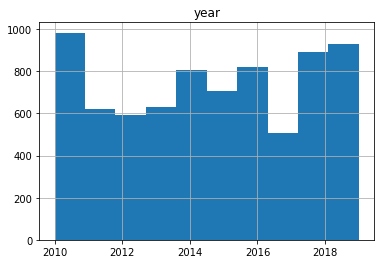

In [57]:
df.hist('year', grid=True, bins=10);

Наблюдается явный провал в данных за 2017й год. Больше всего фильмов выпускалось в прокат в 2010 и 2018-2019 годах

Посчитаем, в каком году было больше всего фильмов, по которым есть данные

In [58]:
df.groupby('year')['box_office'].count() 

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

In [59]:
# Посчитаем долю
df.groupby('year')['box_office'].count() / df.groupby('year')['year'].count()

year
2010   0.11
2011   0.18
2012   0.22
2013   0.29
2014   0.35
2015   0.66
2016   0.64
2017   0.71
2018   0.53
2019   0.57
dtype: float64

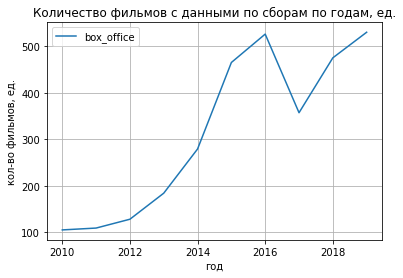

In [60]:
(
    df.pivot_table(index='year', values='box_office', aggfunc='count')
        .plot(grid=True, title='Количество фильмов с данными по сборам по годам, ед.', xlabel='год', ylabel='кол-во фильмов, ед.')
);

Больше всего данных по прокату в период с 2015 по 2019. Также в этот промежуток самое большое "качество" данных

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

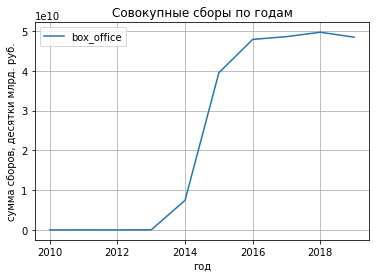

In [61]:
(
    df.pivot_table(index='year', values='box_office', aggfunc='sum')
        .plot(grid=True, title='Совокупные сборы по годам', xlabel='год', ylabel='сумма сборов, десятки млрд. руб.')
);

Пик показателя совокупных сборов приходится на 2018й год

In [62]:
df.pivot_table(index='year', values='box_office', aggfunc='sum')

,box_office
year,
2010,"2,428,654.00"
2011,"14,102,765.00"
2012,"6,955,423.00"
2013,"29,799,706.20"
2014,"7,444,951,859.20"
2015,"39,497,365,196.40"
2016,"47,866,299,741.91"
2017,"48,563,707,217.51"
2018,"49,668,403,134.32"


Совокупные сборы росли по экспоненте. Либо имеет место ошибка в данных, либо в 2015ом году произошёл бум киноиндустрии в России. В любом случае лучше не использовать для анализа данные до 2014го года включительно

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [63]:
df.pivot_table(index='year', values='box_office', aggfunc=['median', 'mean'])

,median,mean
,box_office,box_office
year,,
2010,"1,700.00","23,130.04"
2011,"3,000.00","129,383.17"
2012,"5,660.00","54,339.24"
2013,"3,522.50","161,954.92"
2014,"18,160.00","26,684,415.27"
2015,"4,920,933.00","84,940,570.31"
2016,"3,846,679.41","91,000,569.85"
2017,"9,968,340.00","136,032,793.33"


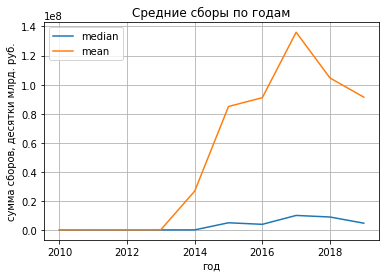

In [64]:
(
    df.pivot_table(index='year', values='box_office', aggfunc=['median', 'mean'])
        .droplevel(1, axis=1)
            .plot(grid=True, title='Средние сборы по годам', xlabel='год', ylabel='сумма сборов, десятки млрд. руб.')
);

Заметим, что с 2014го года разрыв между средним и медианой крайне велик. 

Это может означать, что дисперсия в этот промежуток крайне высока, а следовательно дело в том, что среди всех фильмов есть те, которые собрали в прокате во много раз больше, чем основная масса

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год

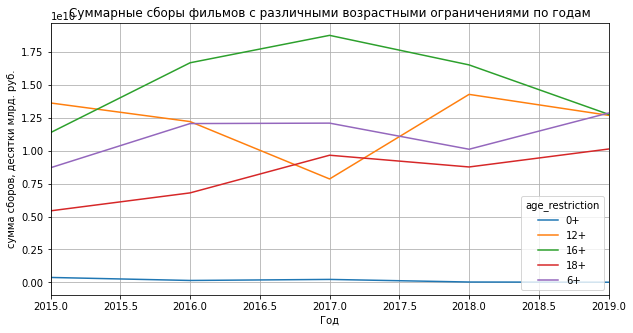

In [65]:
(
    df.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc=['sum'])
        .droplevel(0, axis=1)
            .plot(grid=True, title='Суммарные сборы фильмов с различными возрастными ограничениями по годам', 
                  xlabel='Год', ylabel='сумма сборов, десятки млрд. руб.', xlim=(2015, 2019), figsize=(10,5))
);

Больше всего в прокате собрали фильмы с возрастным ограничением 16+, хотя к 2019му году отрыв от других категорий сократился

Меньше всего собирают фильмы с возрастным ограничением 0+

Построим также график для средних

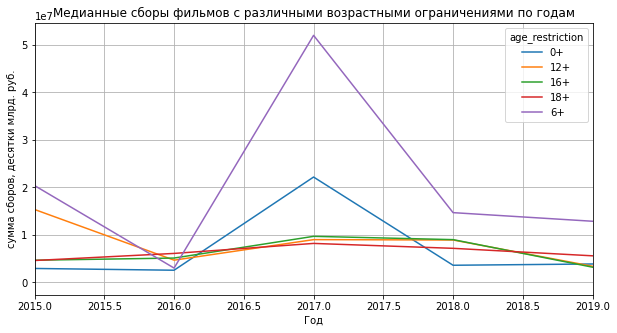

In [66]:
(
    df.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc=['median'])
        .droplevel(0, axis=1)
            .plot(grid=True, title='Медианные сборы фильмов с различными возрастными ограничениями по годам', 
                  xlabel='Год', ylabel='сумма сборов, десятки млрд. руб.', xlim=(2015, 2019), figsize=(10,5))
);

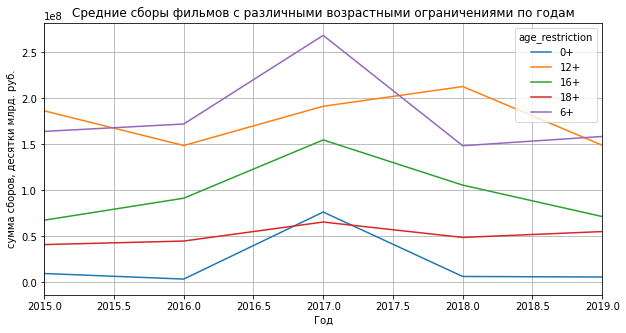

In [67]:
(
    df.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc=['mean'])
        .droplevel(0, axis=1)
            .plot(grid=True, title='Средние сборы фильмов с различными возрастными ограничениями по годам', 
                  xlabel='Год', ylabel='сумма сборов, десятки млрд. руб.', xlim=(2015, 2019), figsize=(10,5))
);

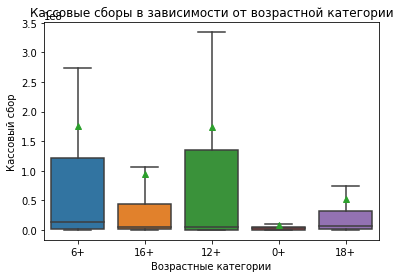

In [68]:
temp = df[df.box_office > 0].copy()
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'));


Вывод:

Для анализа лучше всего подходят данные за период с 2015го по 2019й год, так как за этот промежуток больше всего данных по сборам

В результате анализа оказалось, что категорией кино с самыми высокими показателями совокупных сборов является кино с возрастным ограничением 16+. Меньше всего доходов принесла группа с возрастным ограничением 0+. 

Самыми доходными (показатель средних сборов) оказались фильмы возрастной категории 6+ и 12+, наименее прибыльными - 0+. Выходит, что фильмов категории 16+, хоть и выходит больше, что делает эту категорию лидером по совокупным сборам, но норма прибыли больше у фильмов 6+ и 12+

Самым доходным годом для Российского кино по показателю совокупных сборов является 2018й

Годом, в котором наблюдалась самая высокая доходность, является 2017й

### Шаг 4. Проведём исследование данных о фильмах, которые получили государственную поддержку

Добавим в столбец столбец с информацией о прибыльности фильмов, которые получили гос поддержку

In [69]:
df['margin'] = df.loc[df['budget'].isna()==False, 'box_office'] / df.loc[df['budget'].isna()==False, 'budget'] - 1

Выведем на экран данные о фильмах, которые получили господдержку

In [70]:
df_budget = df[df['budget'].isna()==False]

In [71]:
df_budget.describe()

,index,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office,year,gov_funds_share,margin
count,332.00,332.00,332.00,332.00,332.00,316.00,318.00,332.00,332.00,318.00
mean,"4,428.27","111,593,819.10","11,864,457.83","48,980,988.89","131,422,395.80",6.02,"132,432,420.05","2,016.72",0.54,-0.17
std,"1,859.74","5,703,031.32","24,916,555.26","59,980,117.92","187,148,242.67",1.15,"334,837,856.99",1.64,0.20,1.69
min,"1,281.00","111,000,115.00",0.00,0.00,"6,000,000.00",1.00,"1,550.00","2,013.00",0.04,-1.00
25%,"2,781.25","111,004,891.50",0.00,"25,000,000.00","45,524,799.50",5.30,"1,236,675.50","2,015.00",0.38,-0.98
50%,"3,616.00","111,010,367.00",0.00,"30,000,000.00","71,196,901.50",6.20,"15,720,067.71","2,017.00",0.61,-0.82
75%,"6,194.00","111,017,815.75","15,000,000.00","40,375,000.00","150,000,000.00",6.70,"106,373,008.27","2,018.00",0.66,-0.03
max,"7,478.00","214,010,116.00","180,000,000.00","400,000,000.00","2,305,074,303.00",9.40,"3,073,568,690.79","2,019.00",1.00,18.21


Из полученного описания выведем, что в таких фильмах доля помощи государства в бюджете обычно составляет 54,2%

Кроме того, можно заметить, что такие фильмы оказываются неприбыльными

Также заметим, что медианный рейтинг таких фильмов значительно ниже (на полбалла), чем медианный рейтинг всех фильмов в датафрейме

In [72]:
# выведем на экран количество окупившихся и неокупившихся фильмов
print('количество прибыльных фильмов', df[df['margin']>0]['margin'].count())

print('количество неприбыльных фильмов', df[df['margin']<0]['margin'].count())

количество прибыльных фильмов 79
количество неприбыльных фильмов 239


Посчитаем также как отличается рейтинг Российских фильмов, не получивших финансирование, и Российских фильмов, которые получили финансирование

In [73]:
(
    print('Рейтинг фильмов, получивших государственную поддержку:', 
          df_budget['ratings'].mean().round(2))
)
(
    print('Рейтинг фильмов, не получивших государственную поддержку:', 
          df.loc[(df['budget'].isna()==True)&(df['production_country'] == 'Россия'), 'ratings'].mean().round(2))
)

Рейтинг фильмов, получивших государственную поддержку: 6.02
Рейтинг фильмов, не получивших государственную поддержку: 6.18


Средний рейтинг Российских фильмов, которые не получили финансирование, хоть и не намного (менее, чем на 2 десятых балла), но выше, чем у тех фильмов, что финансирование получили

Вывод: фильмы, в спонсировании съёмок которых участвовало государство, почти не окупаются, а их рейтинг хуже, чем у фильмов, которые гос поддержку не получили.

Проверим, как влияет на рейтинг и прибыльность факт возмездности помощи

In [74]:
(
    print('Рейтинг фильмов, которым предоставили возмездную помощь государства:', 
          df_budget.loc[df_budget['refundable_support'].isna() == False, 'ratings'].mean().round(2))
)
(
    print('Рейтинг фильмов, которым предоставили безвозмездную помощь государства:', 
          df_budget.loc[df_budget['nonrefundable_support'].isna() == False, 'ratings'].mean().round(2))
)

Рейтинг фильмов, которым предоставили возмездную помощь государства: 6.02
Рейтинг фильмов, которым предоставили безвозмездную помощь государства: 6.02


Получается, что не имеет значение возвратные или невозвратные средства использовались при субсидировании

Теперь проанализируем, как возвратность средств сказывается на прибыльности

In [75]:
(
    print('Прибыльность фильмов, которым предоставили возмездную помощь государства:', 
          df_budget.loc[df_budget['refundable_support'].isna() == False, 'margin'].mean().round(2))
)
(
    print('Прибыльность фильмов, которым предоставили безвозмездную помощь государства:', 
          df_budget.loc[df_budget['nonrefundable_support'].isna() == False, 'margin'].mean().round(2))
)

Прибыльность фильмов, которым предоставили возмездную помощь государства: -0.17
Прибыльность фильмов, которым предоставили безвозмездную помощь государства: -0.17


К сожалению, у нас не получится сравнить прибыльность картин с гос поддержкой с прибыльностью картин без гос поддержки, так как по последним нет данных о бюджете

Вывод:

И возвратные, и невозвратные средства одинаково плохо влияют на качество картины

Посмотрим также, какой жанр является самым прибыльным, а какой наименее прибыльным

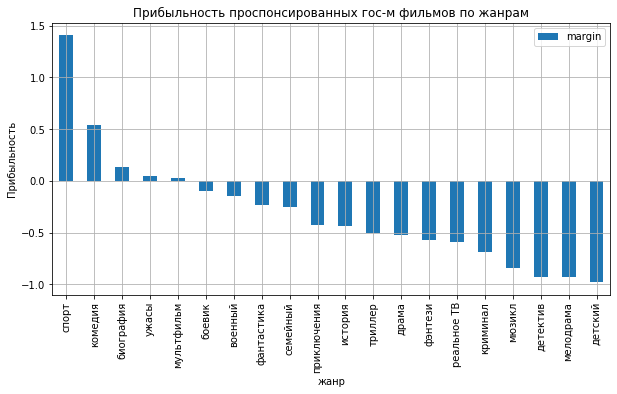

In [76]:
df_filtered = df[df['major_genres'] != 'unclassified']

(
    df_filtered.pivot_table(index='major_genres', values='margin', aggfunc='mean')
            .sort_values(by='margin', ascending=False)
                .plot(kind='bar',grid=True, figsize=(10,5)
                     ,title='Прибыльность проспонсированных гос-м фильмов по жанрам' 
                          ,xlabel='жанр', ylabel='Прибыльность')
);

Как мы видим, наиболее прибыльные жанры - спорт и комедия. Наименее прибыльными в Российском прокате являются детские фильмы, мюзиклы, детективы и мелодрамы

Проверим, фильмам какого жанра Российское государство выделяло средства наиболее часто

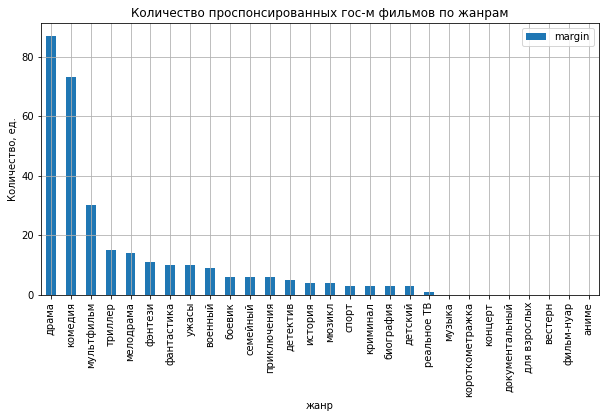

In [77]:
(
    df_filtered.pivot_table(index='major_genres', values='margin', aggfunc='count')
            .sort_values(by='margin', ascending=False)
                .plot(kind='bar',grid=True, figsize=(10,5)
                     ,title='Количество проспонсированных гос-м фильмов по жанрам' 
                          ,xlabel='жанр', ylabel='Количество, ед.')
);

Государство чаще всего спонсировало производство драм, комедий и мультфильмов. Наименее "популярные" в этом списке проекты - фильмы жанра реалитишоу, криминального жанра, детские и спортивные фильмы

Посмотрим, какие спортивные фильмы с гос поддержкой выходили в Российский прокат

In [78]:
df[(df['budget'].isna()==False)&(df['major_genres']=='спорт')]

,index,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,...,budget,financing_source,ratings,genres,box_office,year,major_director,major_genres,gov_funds_share,margin
3135,3135,Чемпионы: Быстрее. Выше. Сильнее,"111,021,115.00",2015-12-22 12:00:00,Художественный,"ООО ""Энджой мувиз""",Россия,А.Аксененко,"Г.Малков, В.Поляков",6+,...,"90,276,774.00",Фонд кино,7.00,"спорт,драма","168,688,859.10",2015,А.Аксененко,спорт,0.44,0.87
3785,3785,Эластико,"111,016,416.00",2016-10-18 12:00:00,Художественный,"ООО ""Пятый элемент"", ООО ""РЕНОВАЦИО интертейнм...",Россия,М.Расходников,"Г.Малков, В.Поляков, Е.замалиев, А.Кузьминов, ...",12+,...,"30,000,000.00",Фонд кино,6.30,"спорт,мелодрама,криминал","19,393,384.34",2016,М.Расходников,спорт,0.50,-0.35
5651,5653,Движение вверх,"111,011,817.00",2017-12-21 12:00:00,Художественный,"ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""",Россия,А.Мегердичев,"Л.Верещагин, А.Златопольский, Н.Михалков, ООО ...",6+,...,"590,192,191.00",Фонд кино,7.50,"спорт,драма","2,779,686,144.00",2017,А.Мегердичев,спорт,0.68,3.71


Движение вверх - один из самых успешных Российских фильмов. Неудивительно, что прибыльность спортивных картин так велика

Проанализируем, какие режиссёры Российского кино самые успешные, по двум метрикам: прибыльности и рейтингу

In [79]:
print('Наиболее высокооценённые режиссёры')
(
    df_budget
        .pivot_table(index='major_director', values=['margin', 'ratings'], aggfunc='mean')
            .sort_values(by='ratings',ascending=False)
                .round(2)
                    .head(10)
)

Наиболее высокооценённые режиссёры


,margin,ratings
major_director,,
Ю.Кара,-0.99,9.40
Н.Степанова при участии С.Иванова,-0.94,9.00
А.Атанесян,-1.00,8.10
А.Попова,NaN,8.00
К.Оганисян,-0.31,7.90
В.Татарский,-1.00,7.80
И.Шахназаров,-0.99,7.80
А.Андрианов,1.46,7.80
А.Учитель,-0.50,7.70


In [80]:
print('Наиболее "прибыльные" режиссёры')
(
    df_budget
        .pivot_table(index='major_director', values=['margin', 'ratings'], aggfunc='mean')
            .sort_values(by='margin',ascending=False)
                .round(2)
                    .head(10)
)

Наиболее "прибыльные" режиссёры


,margin,ratings
major_director,,
О.Трофим,8.73,NaN
А.Черномазов (псевдоним Алексей Нужный),6.23,6.90
К.Шипенко,5.92,6.83
А.Першин (псевдоним Ж.Крыжовников),4.23,4.70
М.Бальчюнас,4.08,6.00
А.Мегердичев,3.71,7.50
К.Феоктистов,3.35,5.50
М.Бальчюнас (псевдоним Марюс Вайсберг),3.33,5.30
Ф.Бондарчук,3.15,5.60


Среди самых высокооценённых режиссёров нет ни одного знакомого имени((((( (ну разве что Адрианов, который снял несколько исторических сериалов)

Однако можно сделать вывод, что высокий рейтинг не всегда означает большую прибыльность (надо, кстати, будет сейчас проверить зависимость прибыльности от рейтинга)

Среди самых прибыльных режиммёров выделяется О.Трофим, который снял самый прибыльный дебютный фильм в истории Российского кино - спортивную драму "Лёд". В этом рейтинге также есть и другие громкие имена Российского кино: Жора Крыжовников и Фёдор Бондарчук. Кстати, среди всех режиссёров в этой десятке Крыжовников имеет самый низкий средний рейтинг своих фильмов (можно злобно похихикать над этим)

In [81]:
# Проверим зависимость прибыльности фильма от его рейтинга
df_budget[['margin', 'ratings', 'gov_funds_share']].corr()

,margin,ratings,gov_funds_share
margin,1.00,0.06,-0.00
ratings,0.06,1.00,-0.07
gov_funds_share,-0.00,-0.07,1.00


Как видно из таблицы, рейтинг, прибыльность и доля государственного участия в финансировании кино никак не зависят друг от друга

Напоследок проверим, какой источник финансирования даёт больше всего денег и как отличается прибыльность фильмов, которые спонсировали различные органы Российского государства

In [82]:
(
    df_budget.pivot_table(index='financing_source', values=['budget', 'margin', 'ratings']
        , aggfunc='mean')
            .round(2)
                .sort_values(by='margin', ascending=False)
)

,budget,margin,ratings
financing_source,,,
Фонд кино,"202,107,685.18",0.35,5.82
Министерство культуры,"69,970,754.62",-0.58,6.15
"Министерство культуры, Фонд кино","120,423,164.05",-0.82,6.44


Наиболее прибыльными проектами являются проекты, финансируемые фондом кино (норма прибыли здесь достигает 35%!!!). Он же в среднем выделяет больше всего денег на проекты

Наименее прибыльными проектами являются проекты, финансируемые минкультом РФ

Заметим также, что в среднем у картин, которые финансировал минкульт, рейтинг выше, чем у картин, которые финансировал фонд кино

Все эти данные можно объяснить тем, что фонд кино чаще финансирует крупные коммерческие проекты, тогда как минкульт поддерживает финансово независимые малоизвестные проекты, которые почти не приносят дохода в прокате

Вывод:

В ходе анализа фильмов, получивших гос поддержку было выявлено, что:
 - Рейтинг Российских фильмов, получивших гос поддержку, меньше, чем у фильмов, не получивших финансирования гос-ва
 - Возвратность средств не влияет на качество фильма (ни на прибыльность, ни на рейтинг)
 - В среднем больше денег на финансирование проектов выделяет ФК, чем Минкульт
 - Рейтинг фильмов, финансируемых Минкультом, выше, чем у фильмов, финансируемых ФК (выше всего рейтинг у фильмов, получивших смежное финансирование)
 - Самыми прибыльными жанрами фильмов оказались спортивные фильмы и комедийные
 - Чаще всего финансировали драмы и комедии

### Шаг 5. Напишите общий вывод

Вывод:

1. Для анализа были объединены две таблицы. Получившийся датафрейм имел множество пропусков, дубликатов и ошибок в данных. 
 - Пропуски были заполнены там, где это возможно
 - Дубликаты были найдены и устранены
 - Новые столбцы добавлены
 
2. В ходе исследовательского анализа было выяснено, что:
 - Лучше всего для анализа подходят данные с 2015 по 2019 года
 - Фильмы с различными возрастными ограничениями имеют разные показатели совокупного дохода и средней доходности
 - Наибольший совокупный доход в Российском прокате принесли фильмы категории 16+
 - Наибольший средний доход у двух категорий: 12+ и 6+

3. В ходе анализа Российского кино, на которые выделялись государственные средства было установлено, что:
 - Фильмы, которые были профинансированы государством, имеют мЕньший рейтинг, чем фильмы, которые не получили финансовой поддержки
 - Не имеет значение, возвратные средства или невозвратные. Это никак не повлияет на качество картины
 - Самыми прибыльными жанрами, которые спонсировало государство, являются спорт и комедия
 - Жанрами, на которые чаще всего выделялись средства, являются драма и комедия
 - Прибыльность картины никак не зависит от количества государственного участия в бюджете картины и от рейтинга
 - В среднем более рентабельными являются картины, спонсируемые фондом кино. Средняя прибыльность картин Минкульта и вовсе отрицательная
 - В среднем фонд кино предоставляет больше средств, чем минкульт
 - В среднем у картин, которые финансировал минкульт выше рейтинг

Для увеличения эффективности киноиндустрии России на основе полученных данных можно предложить министерству культуры и фонду кино пересмотреть подход к выдаче средств для финансирования кинопроектов